In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from aegomoku.game_data import read_training_data
from aegomoku.utils import analyse_example

In [3]:
BOARD_SIZE=15
filename = "the_heuristic_fourty.pickle"
examples = read_training_data(filename, BOARD_SIZE)
len(examples), len(examples[0]), examples[0][0].shape

(8288, 3, (17, 17, 3))

---
### Data Verification
We have 8288 records from 40 games in 8 symmetries. Now we skim through a good chunk of training records to check whether it makes sense (to some degree).

In [4]:
i = 0

Next to play: WHITE
Value from WHITE's point of view: -0.8498382671834787


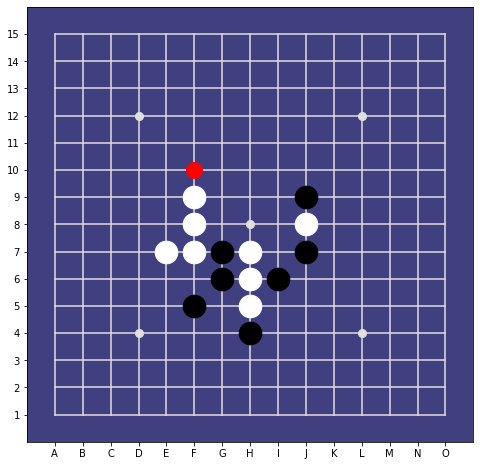

In [5]:
import random

analyse_example(BOARD_SIZE, examples[random.randint(0, 8288)])

In [6]:
from aegomoku.gomoku_model import NeuralNetAdapter

the_model = NeuralNetAdapter(BOARD_SIZE + 2)
the_model.policy.summary()
the_model.policy.compile()

Model: "gomoku_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 initial (Conv2D)            multiple                  11648     
                                                                 
 potential_0 (Conv2D)        multiple                  123936    
                                                                 
 potential_1 (Conv2D)        multiple                  123936    
                                                                 
 potential_2 (Conv2D)        multiple                  123936    
                                                                 
 potential_3 (Conv2D)        multiple                  123936    
                                                                 
 potential_4 (Conv2D)        multiple                  123936    
                                                                 
 policy_aggregator (Conv2D)  multiple                 

2022-08-06 09:13:20.589232: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-06 09:13:20.590035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-06 09:13:20.595372: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-06 09:13:20.596070: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-06 09:13:20.598895: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

In [7]:
sample = np.expand_dims(examples[55][0], axis=0).astype(float)
print(sample.shape)
the_model.policy(sample)

(1, 17, 17, 3)


2022-08-06 09:15:42.950495: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-08-06 09:15:43.124054: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


(<tf.Tensor: shape=(1, 225), dtype=float32, numpy=
 array([[0.00486825, 0.00576359, 0.00645775, 0.00577695, 0.00552954,
         0.00625302, 0.00540201, 0.00589893, 0.00402978, 0.00410986,
         0.00367208, 0.00388758, 0.00450685, 0.0052217 , 0.00513757,
         0.00543171, 0.00583433, 0.00601272, 0.00573316, 0.00494131,
         0.00551109, 0.00521016, 0.00379264, 0.00349864, 0.00349864,
         0.00349864, 0.00349864, 0.00492722, 0.0049747 , 0.00473244,
         0.00514497, 0.00654585, 0.00633676, 0.00593855, 0.00494279,
         0.00455694, 0.00494174, 0.00383783, 0.00349864, 0.00349864,
         0.00349864, 0.00349864, 0.00392605, 0.00475599, 0.00438978,
         0.00458614, 0.00477668, 0.00531456, 0.00469999, 0.00398083,
         0.00435171, 0.00412678, 0.00360355, 0.00349864, 0.00349864,
         0.00349864, 0.00349864, 0.00366639, 0.0043205 , 0.00418604,
         0.00522805, 0.00552415, 0.00559607, 0.00596258, 0.00461347,
         0.00525385, 0.00466897, 0.00412834, 0.00349

In [20]:
the_model.train(examples[:200], epochs_per_train=2000, report_every=100)

Epoch: 1, Training: 1.1492934226989746, Test: 0.0
Epoch: 101, Training: 1.2110552787780762, Test: 0.0
Epoch: 201, Training: 1.1651273965835571, Test: 0.0
Epoch: 301, Training: 1.1549992561340332, Test: 0.0
Epoch: 401, Training: 1.1446386575698853, Test: 0.0
Epoch: 501, Training: 1.1380504369735718, Test: 0.0
Epoch: 601, Training: 1.1379040479660034, Test: 0.0
Epoch: 701, Training: 1.1314367055892944, Test: 0.0
Epoch: 801, Training: 1.127255916595459, Test: 0.0
Epoch: 901, Training: 1.1236457824707031, Test: 0.0
Epoch: 1001, Training: 1.1205480098724365, Test: 0.0
Epoch: 1101, Training: 1.1179708242416382, Test: 0.0
Epoch: 1201, Training: 1.1156388521194458, Test: 0.0
Epoch: 1301, Training: 1.113305926322937, Test: 0.0
Epoch: 1401, Training: 1.1120704412460327, Test: 0.0
Epoch: 1501, Training: 1.1098577976226807, Test: 0.0
Epoch: 1601, Training: 1.1079154014587402, Test: 0.0
Epoch: 1701, Training: 1.106094479560852, Test: 0.0
Epoch: 1801, Training: 1.1043171882629395, Test: 0.0
Epoch: 1

(1, 17, 17, 3)
n=250
Next to play: WHITE
Value from WHITE's point of view: -0.023365041495220274
value = -0.023365041495220274
Next to play: WHITE
Value from WHITE's point of view: [[0.23529759]]
value = [[0.23529759]]


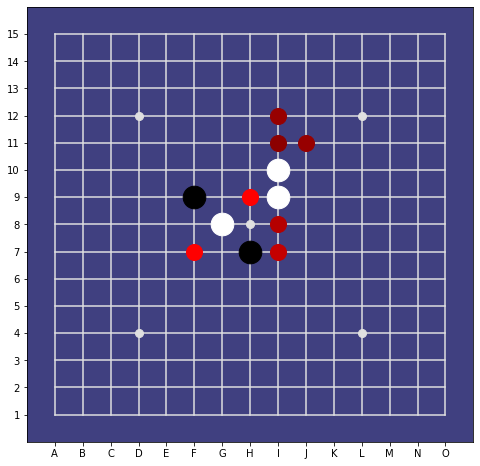

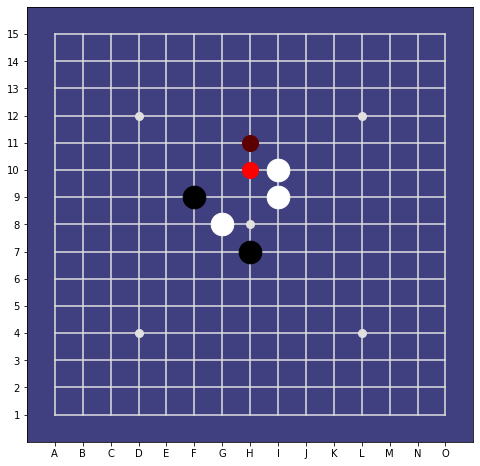

In [34]:
n = random.randint(0, 400)
sample = np.expand_dims(examples[n][0], axis=0).astype(float)
print(sample.shape)
p_, v_ = the_model.policy(sample)
s, p, v = examples[n]
example = (s, list(p_.numpy()), v_)
print(f"n={n}")
analyse_example(BOARD_SIZE, examples[n])
print(f"value = {v}")
analyse_example(BOARD_SIZE, example)
print(f"value = {v_}")